# santander-customer-transaction-prediction

# Import required libraries

In [ ]:
import numpy as np, pandas as pd

# Import data

In [3]:
train = pd.read_csv(r'C:\Users\Thanusha Devarajula\Downloads\santander-customer-transaction-prediction\train(customer_transaction).csv')

In [138]:
test = pd.read_csv(r'C:\Users\Thanusha Devarajula\Downloads\santander-customer-transaction-prediction\test(customer _transaction).csv')

In [139]:
test.shape

(200000, 201)

In [5]:
train.shape   # to get the total no.of columns and rows

(200000, 202)

In [6]:
train.head()   # to get first few rows of the dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
sum(train.isnull().sum())   ####to find the no.of missing values

0

In [8]:
train.head()    ##there are no missing values

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# outliers

In [8]:
train.info()
#train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
#Boxplot for single variable to find if there is any missing values

In [131]:
import matplotlib.pyplot as plt

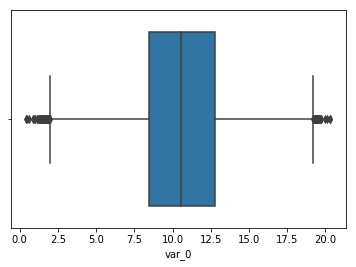

In [8]:
import seaborn as sns
sns.boxplot(x=train['var_0'])


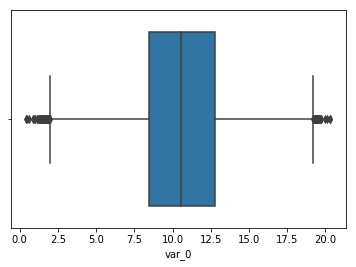

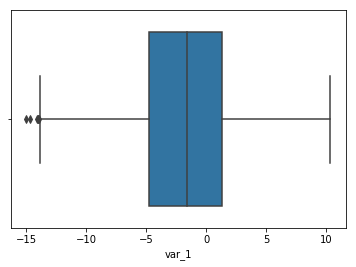

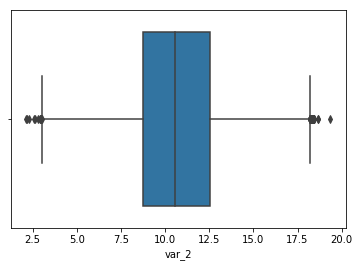

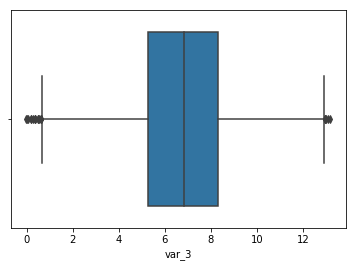

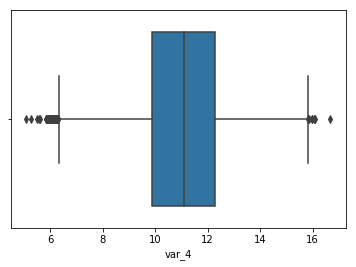

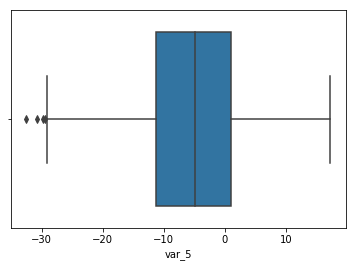

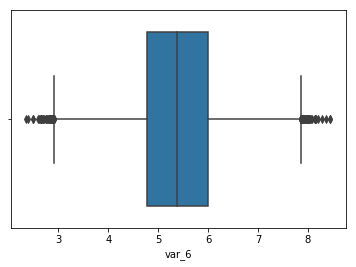

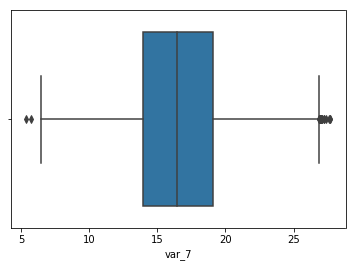

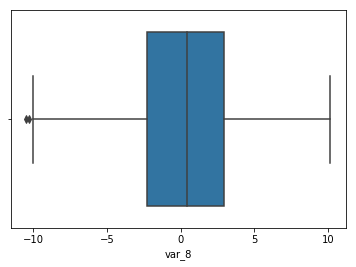

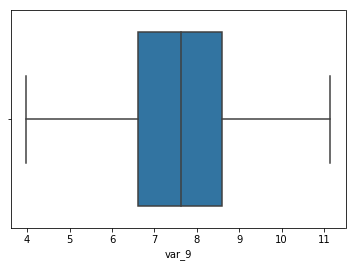

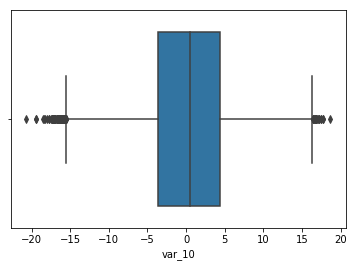

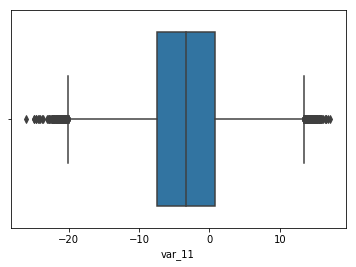

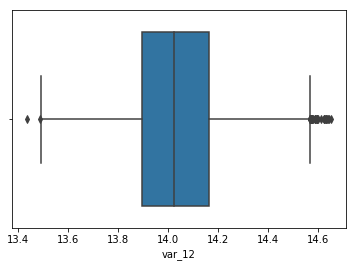

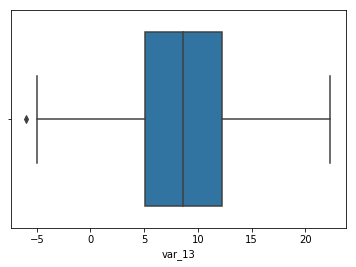

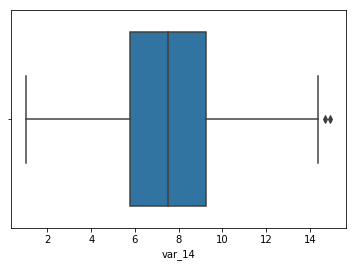

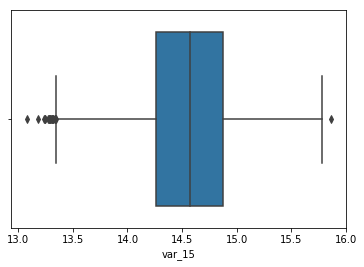

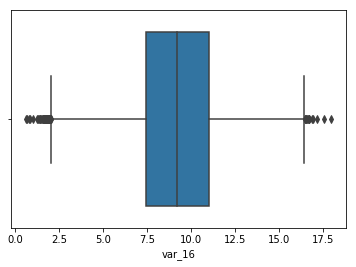

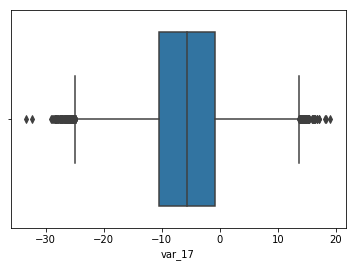

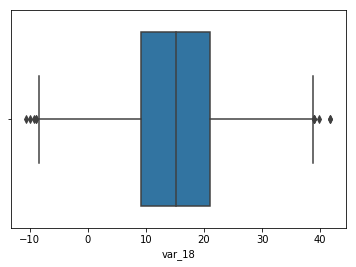

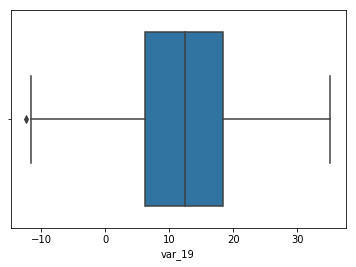

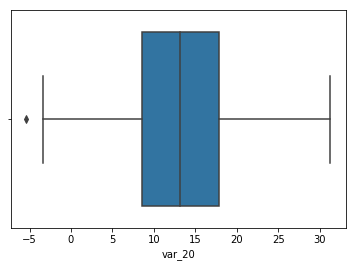

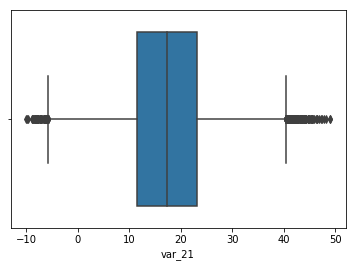

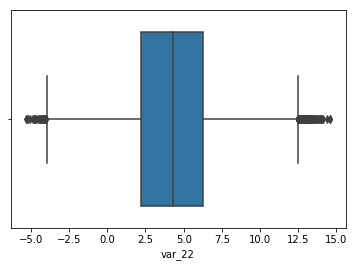

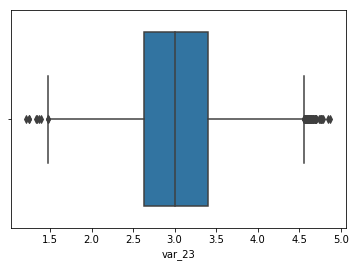

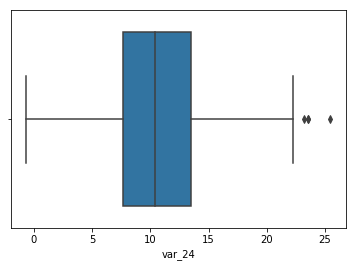

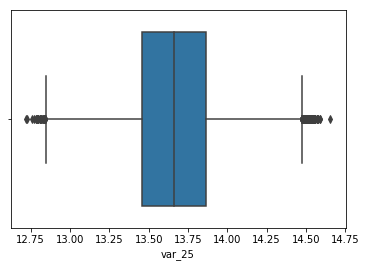

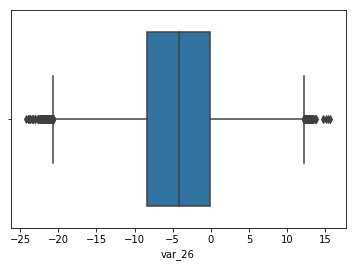

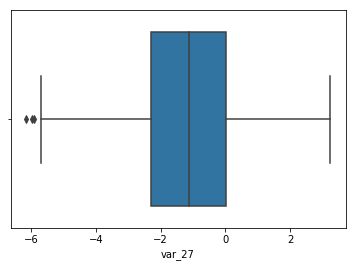

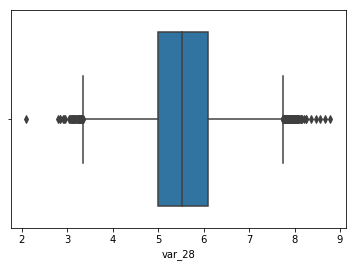

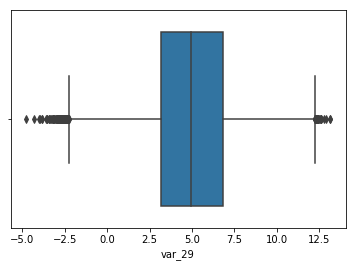

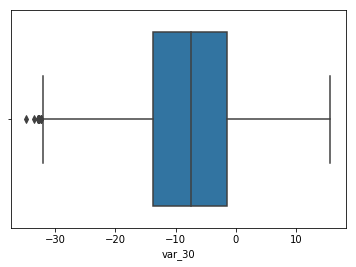

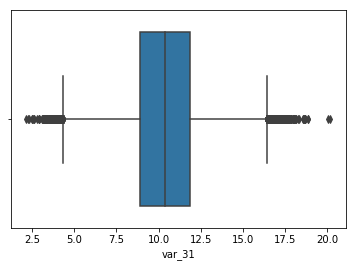

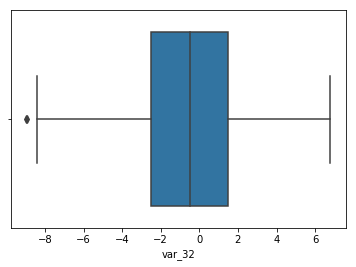

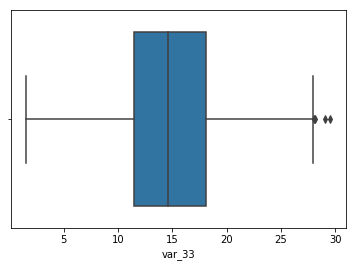

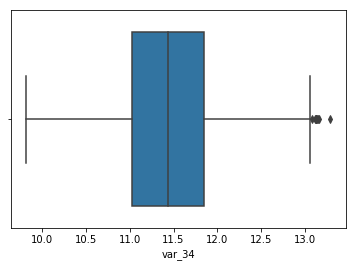

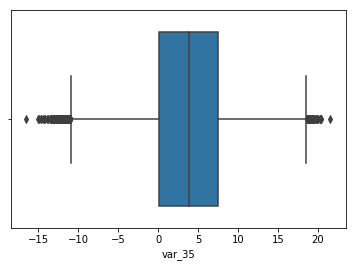

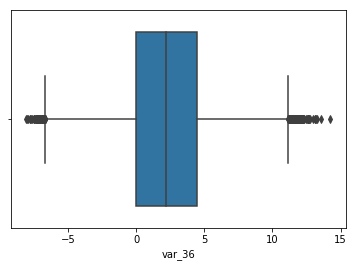

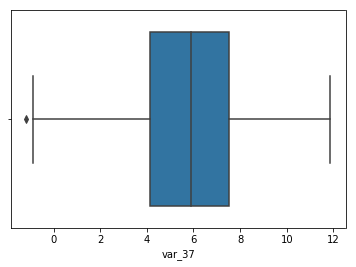

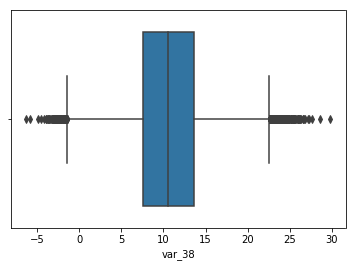

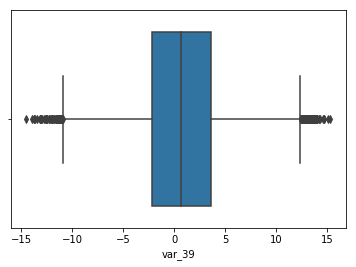

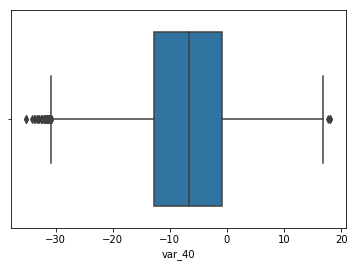

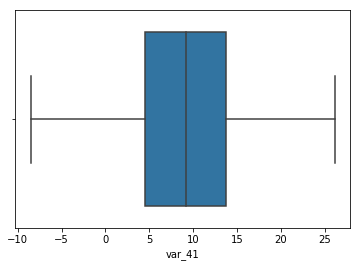

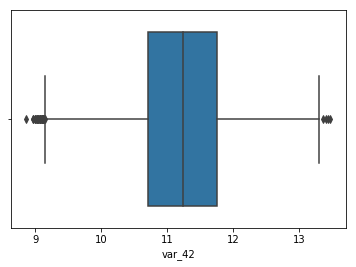

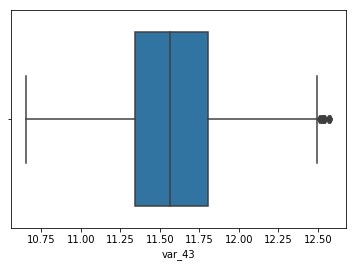

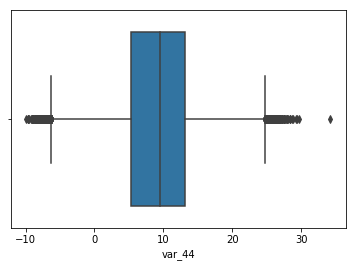

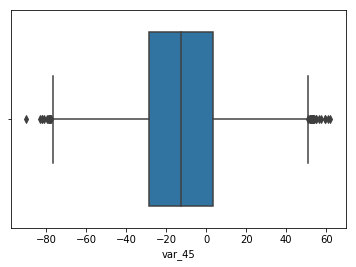

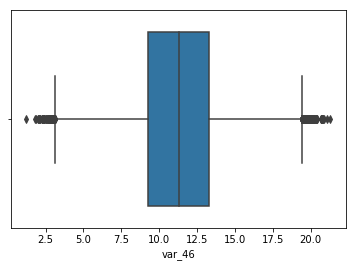

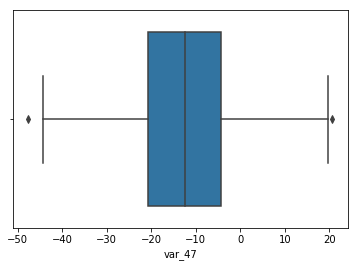

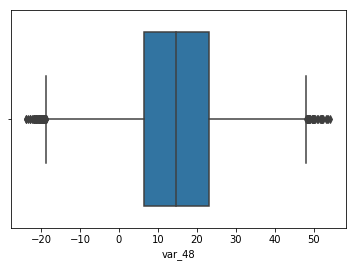

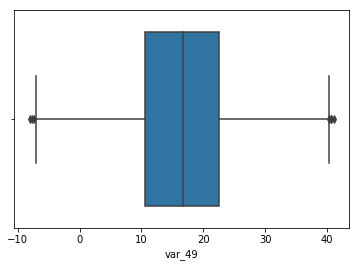

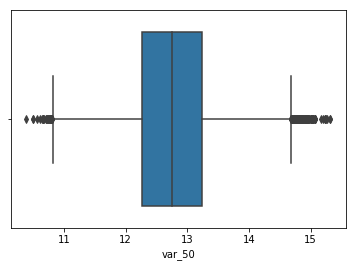

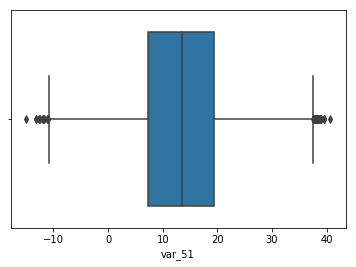

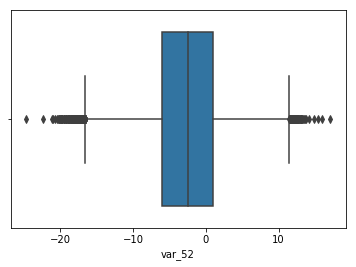

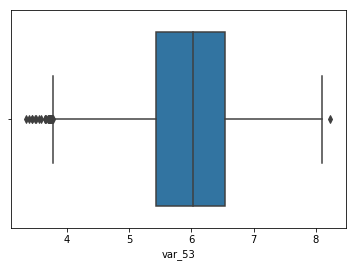

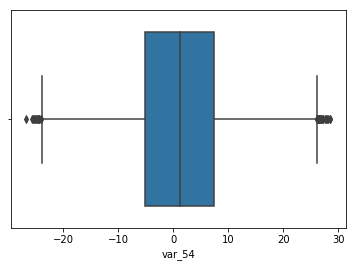

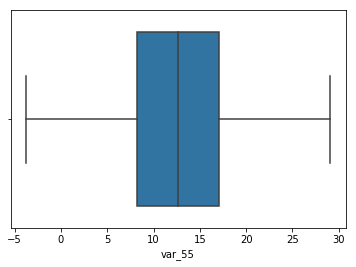

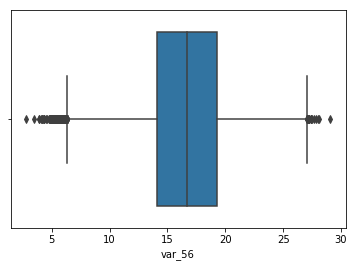

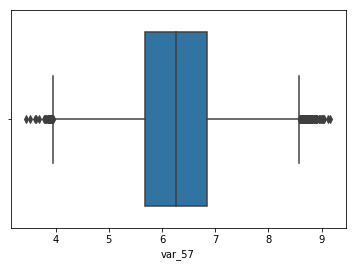

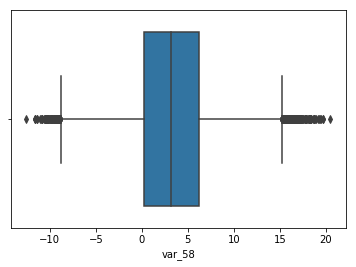

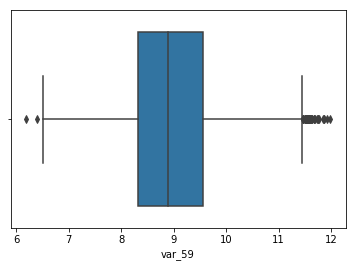

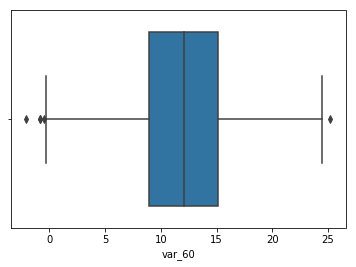

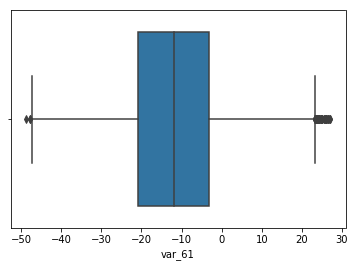

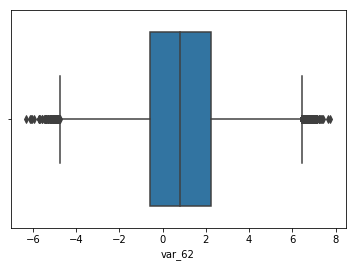

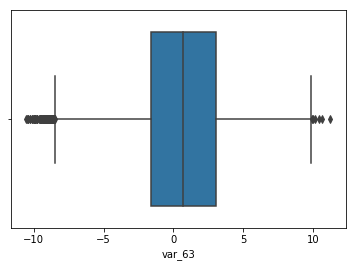

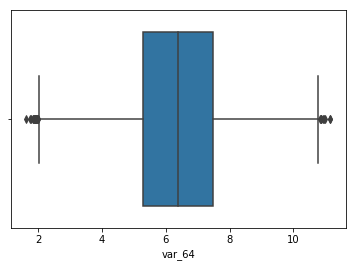

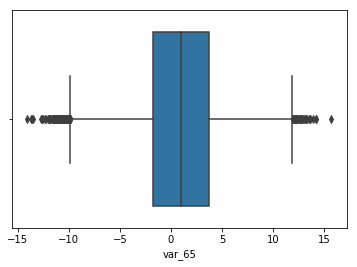

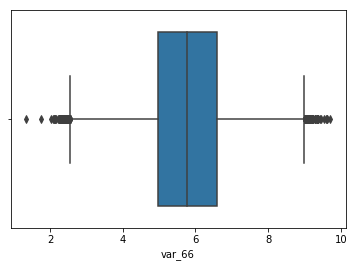

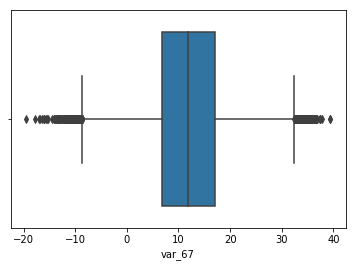

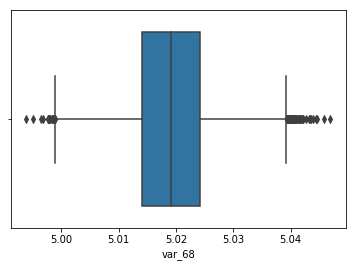

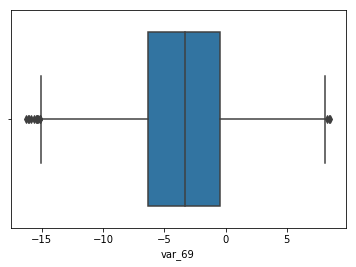

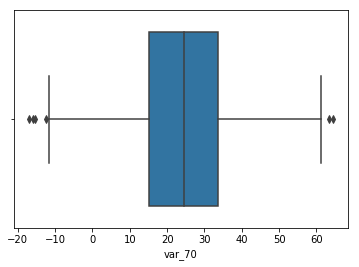

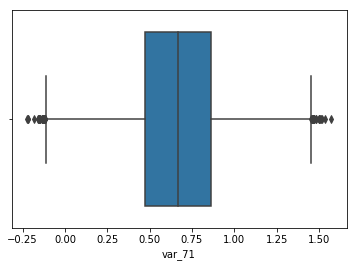

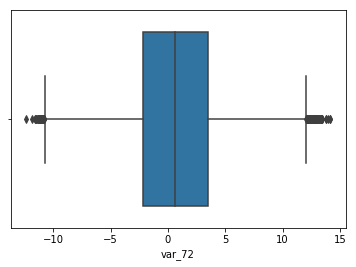

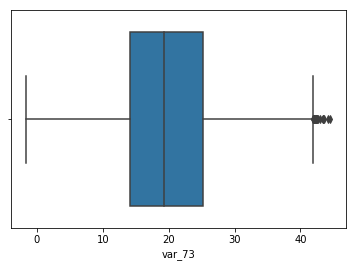

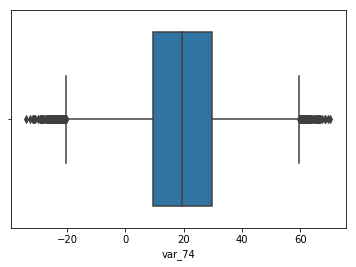

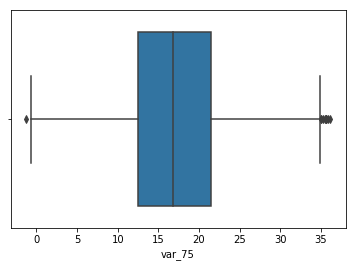

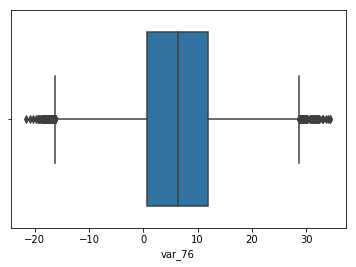

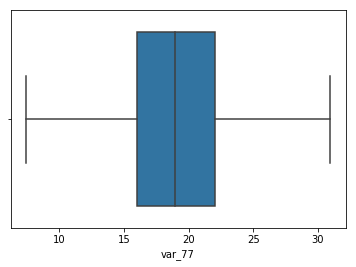

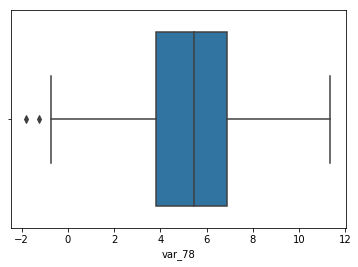

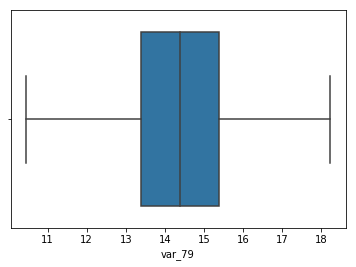

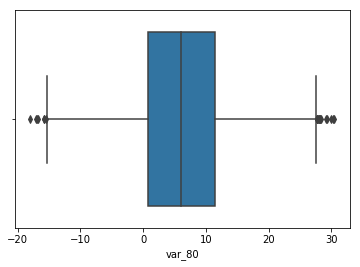

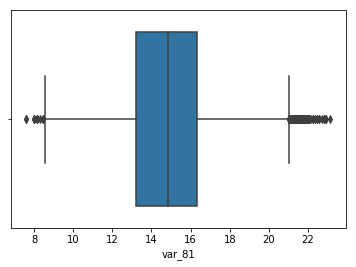

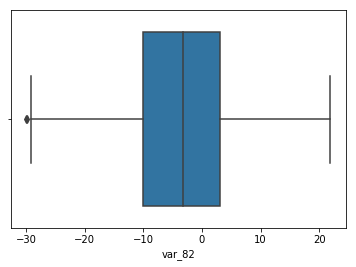

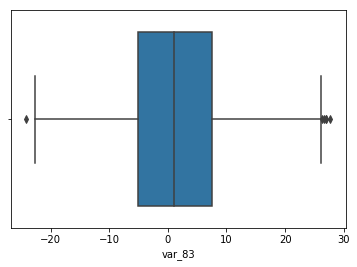

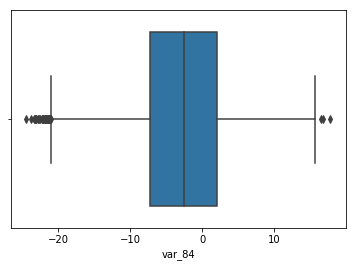

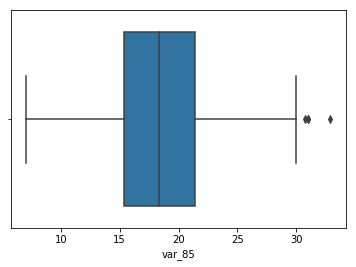

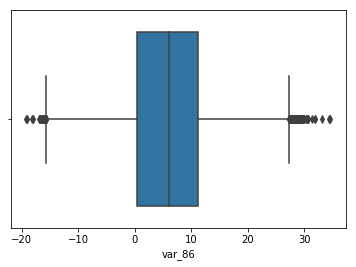

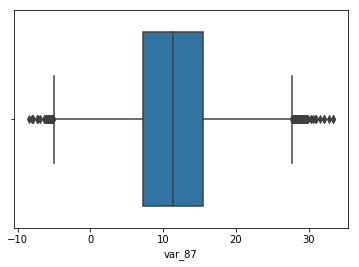

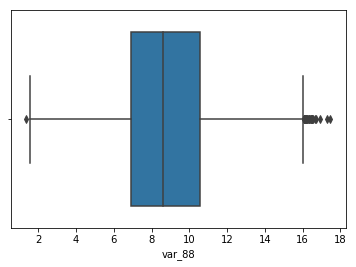

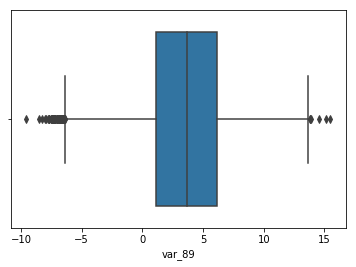

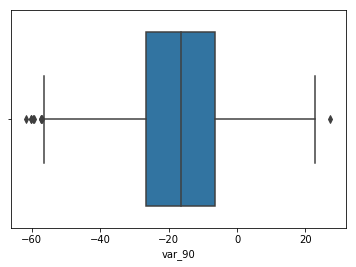

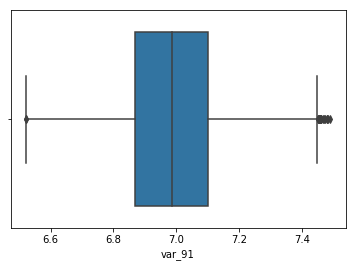

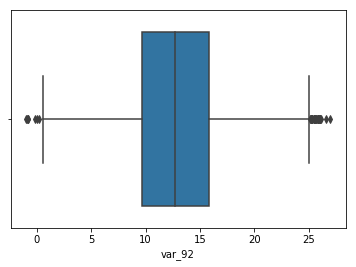

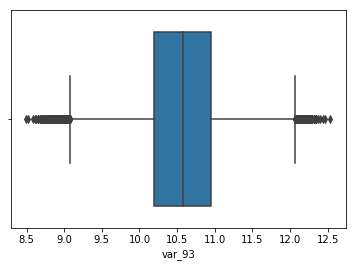

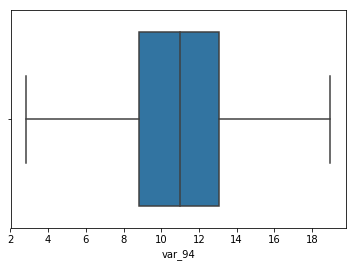

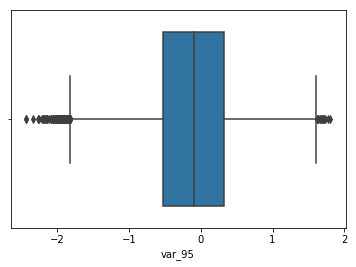

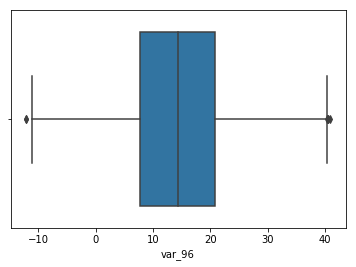

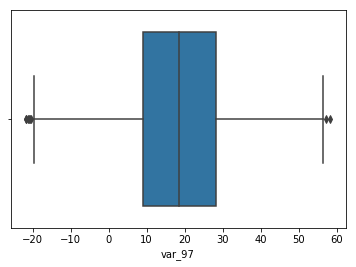

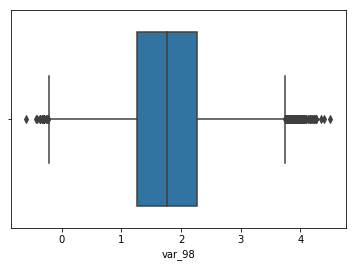

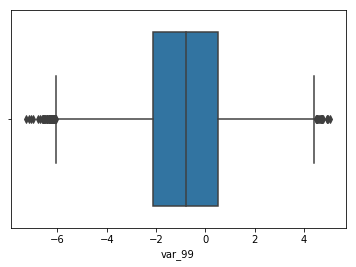

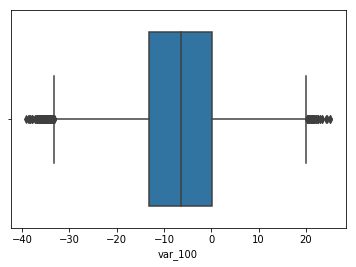

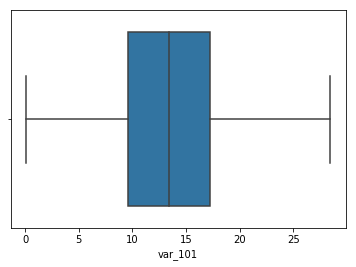

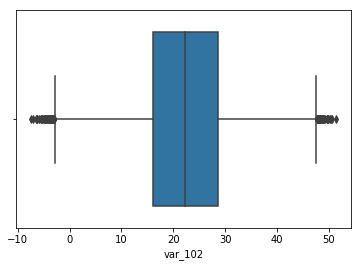

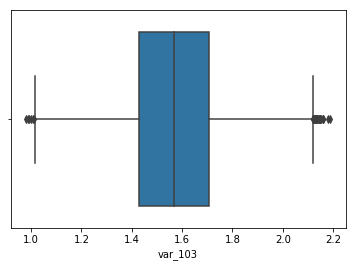

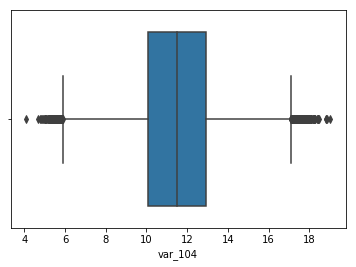

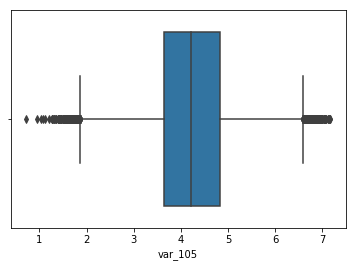

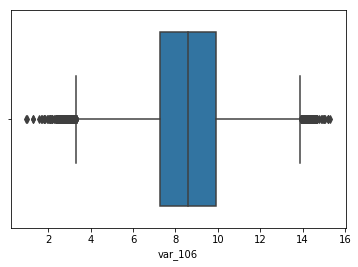

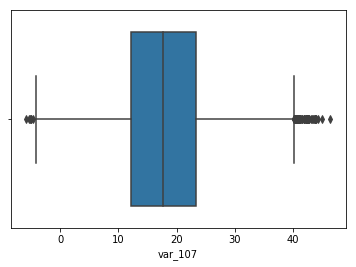

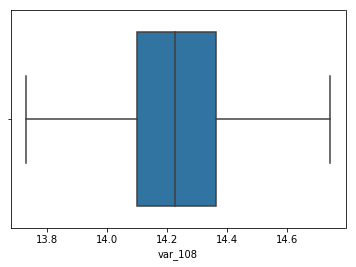

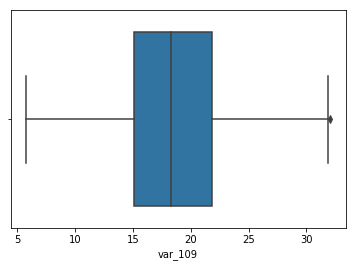

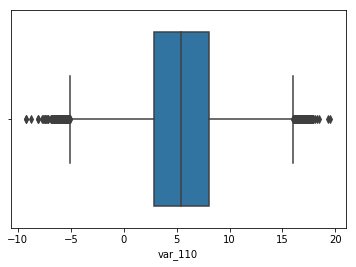

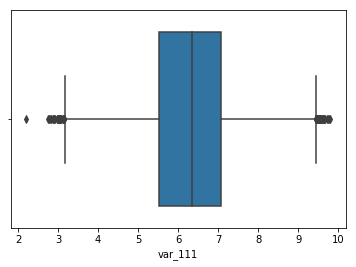

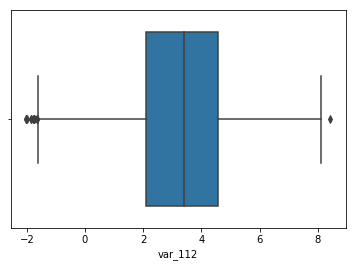

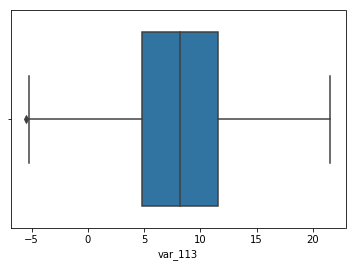

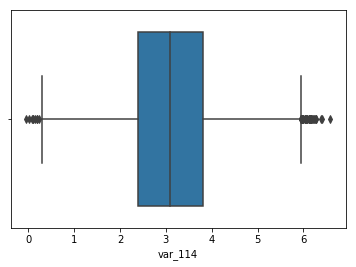

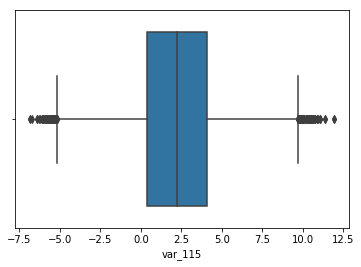

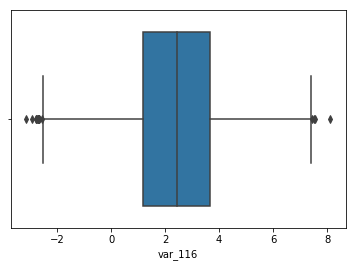

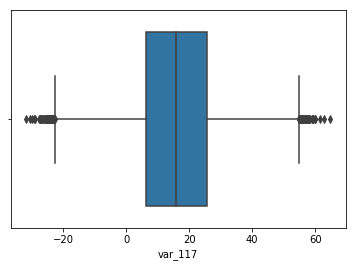

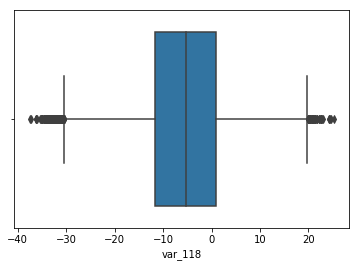

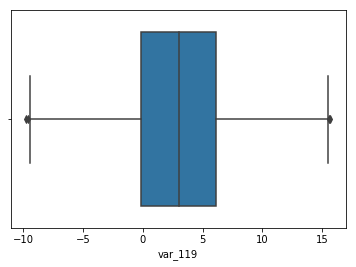

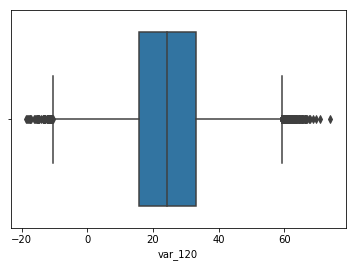

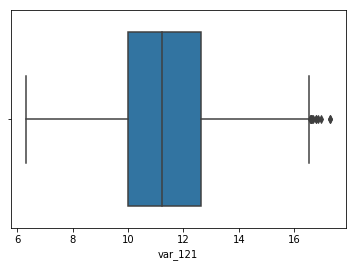

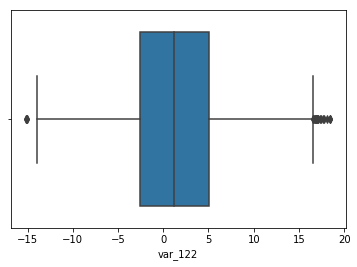

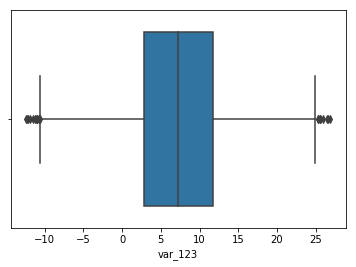

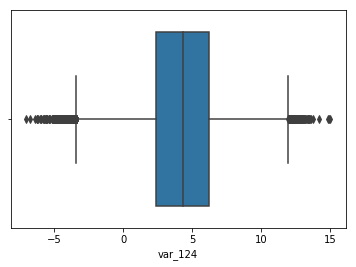

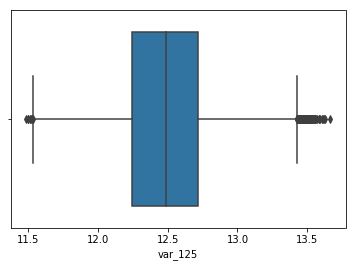

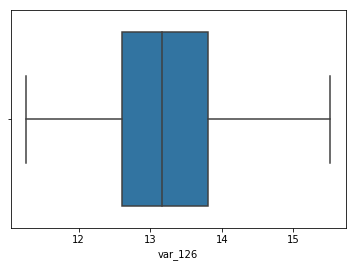

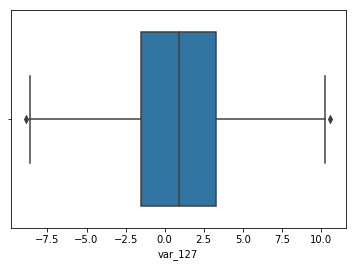

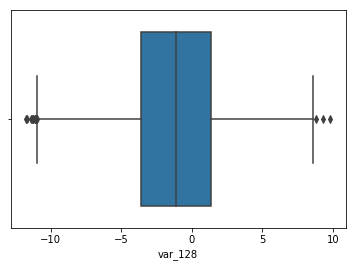

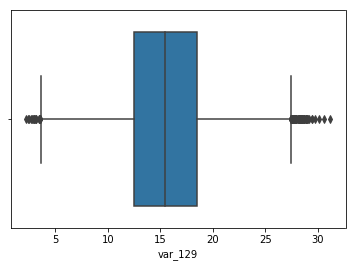

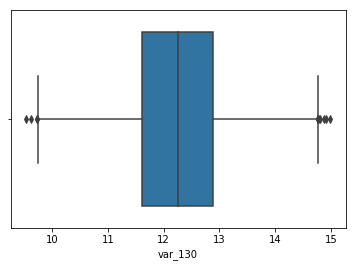

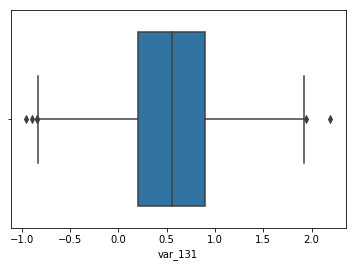

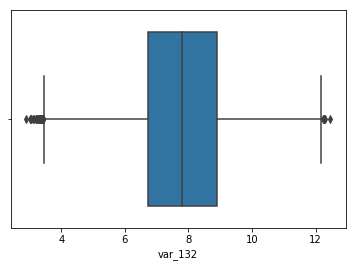

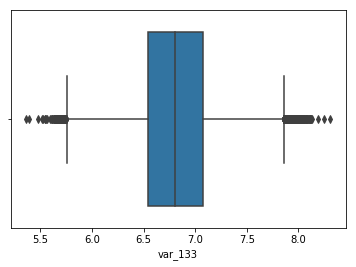

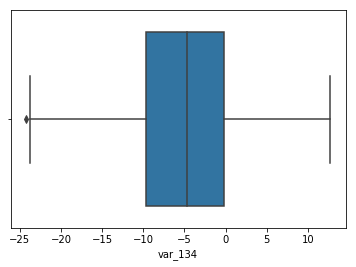

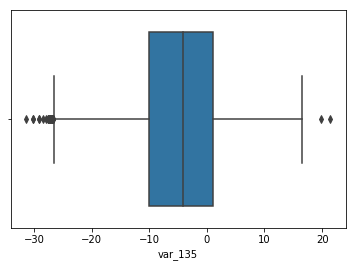

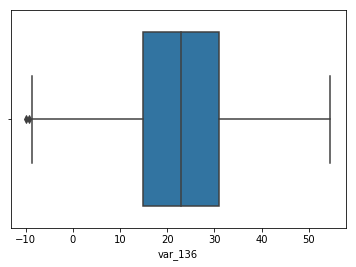

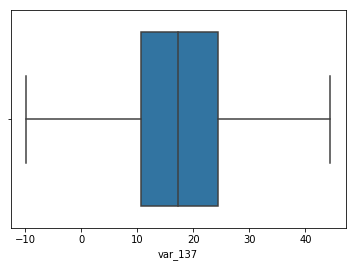

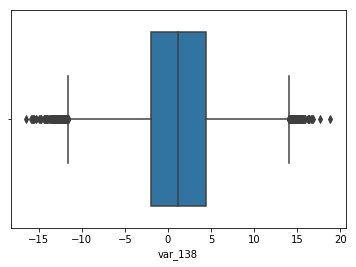

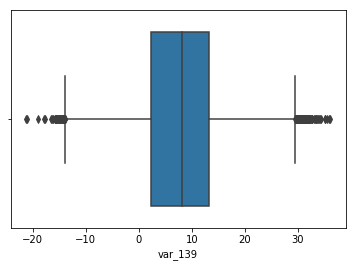

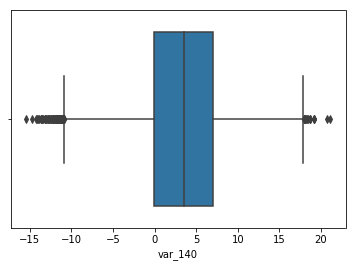

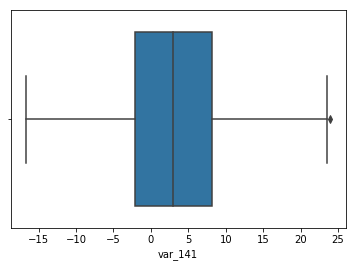

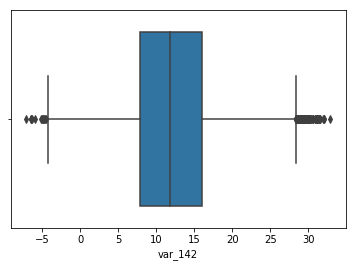

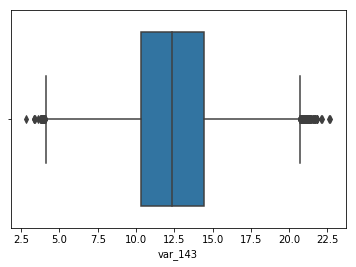

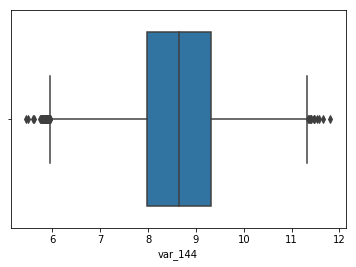

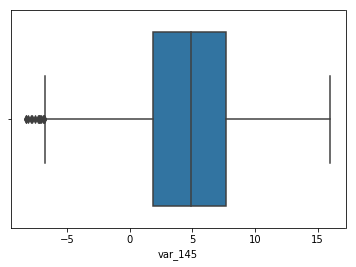

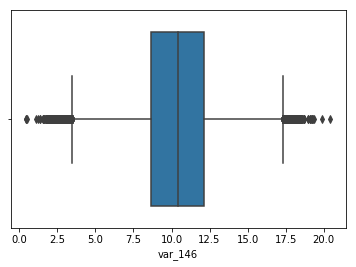

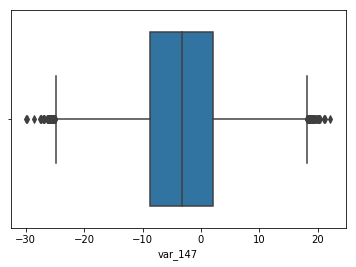

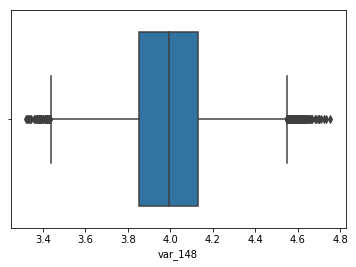

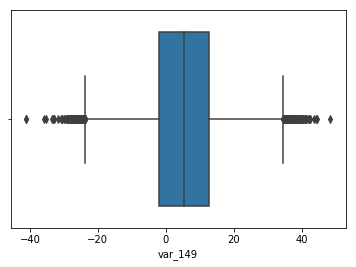

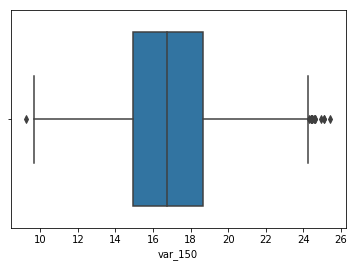

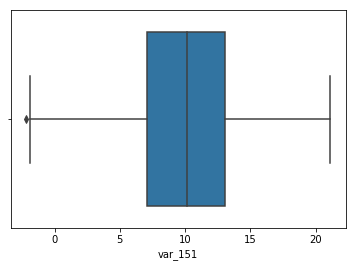

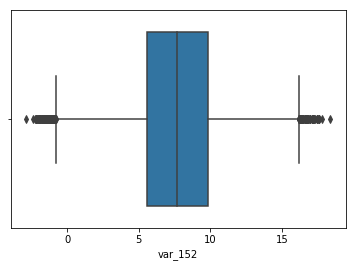

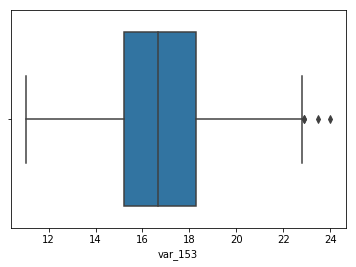

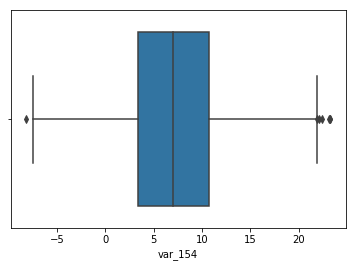

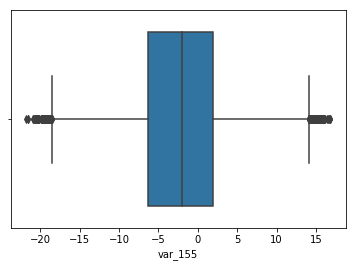

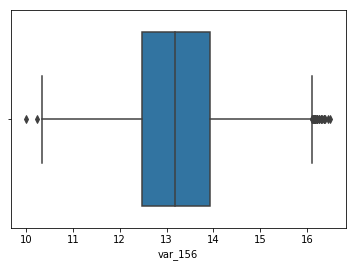

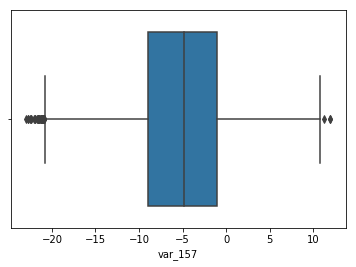

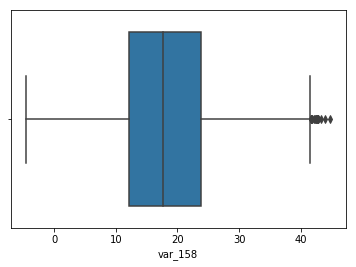

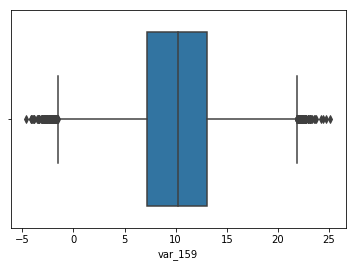

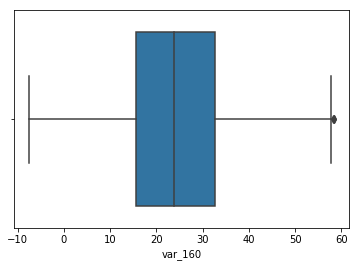

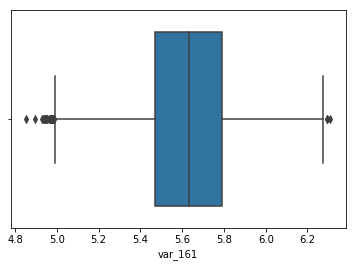

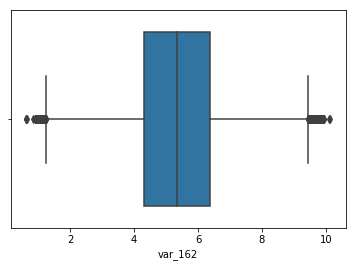

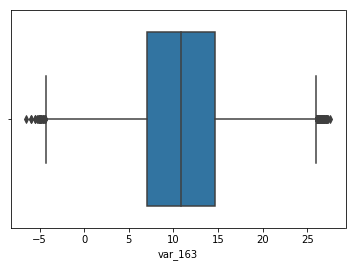

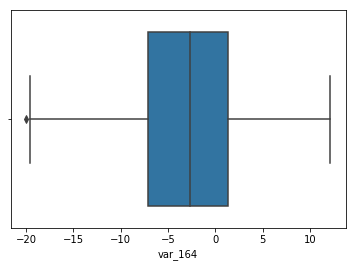

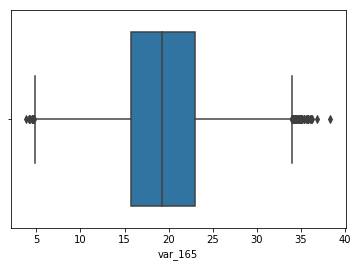

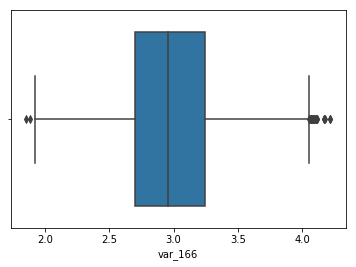

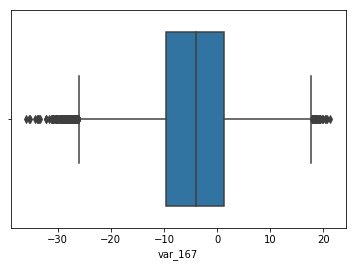

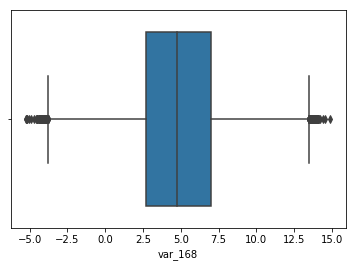

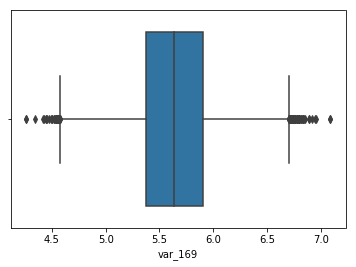

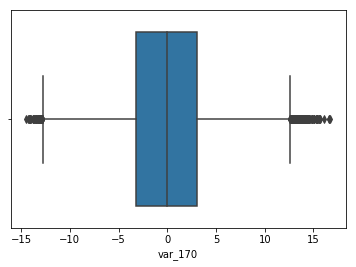

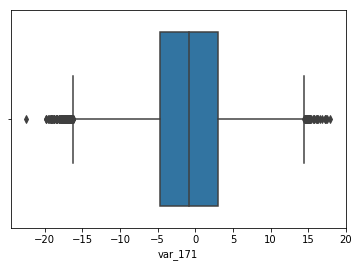

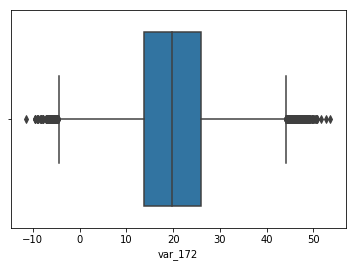

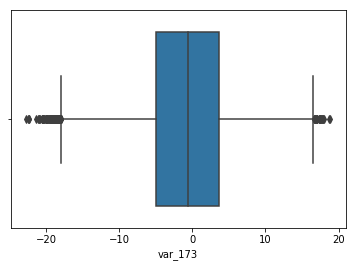

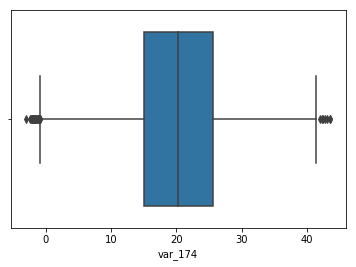

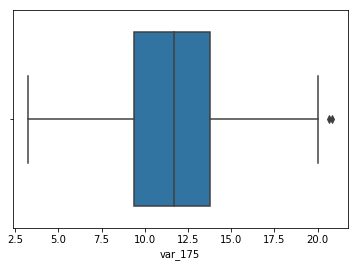

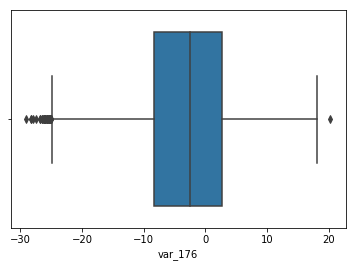

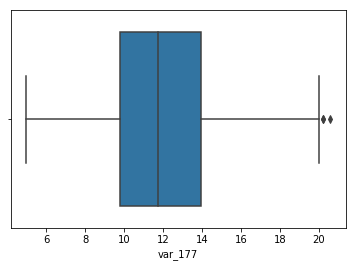

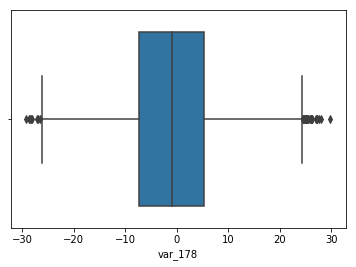

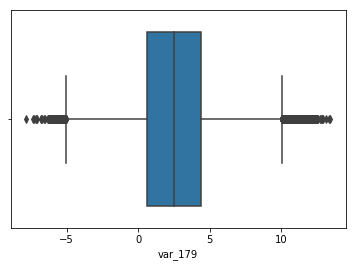

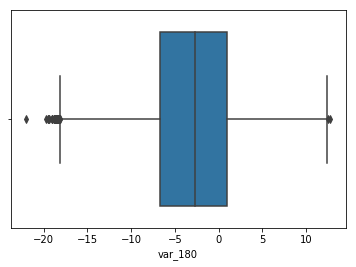

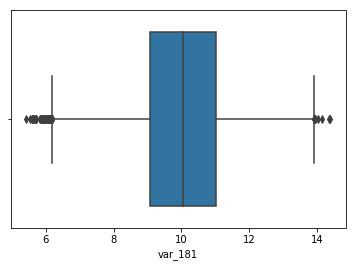

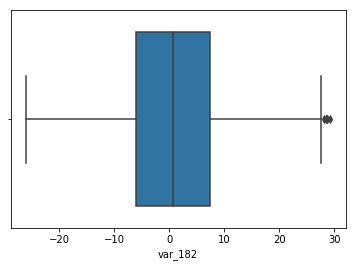

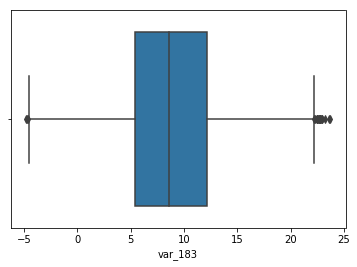

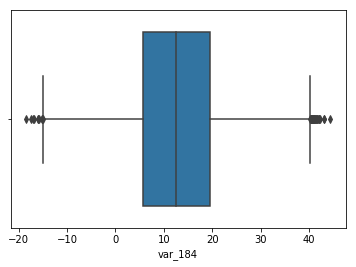

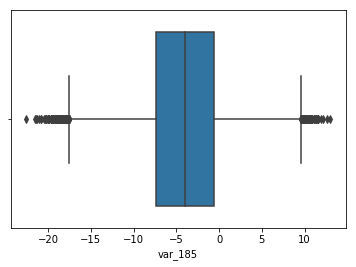

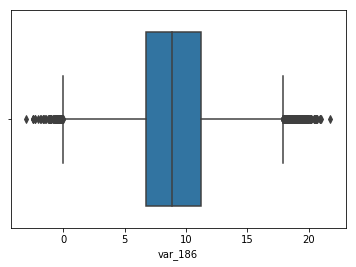

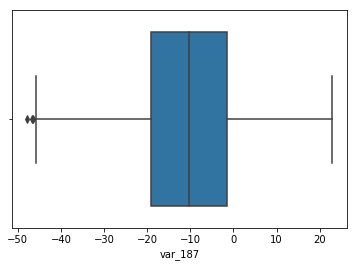

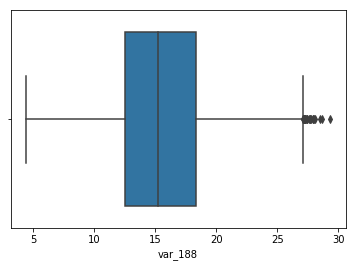

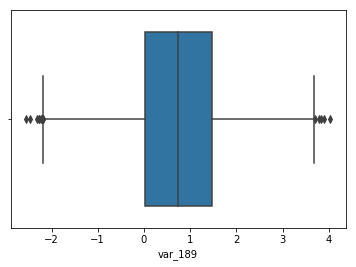

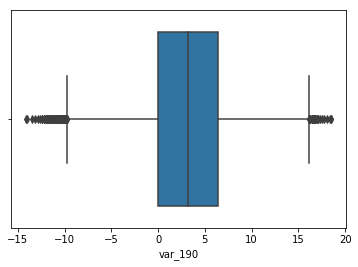

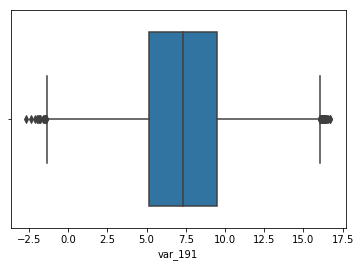

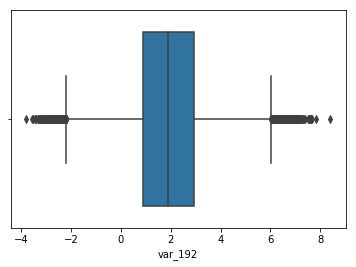

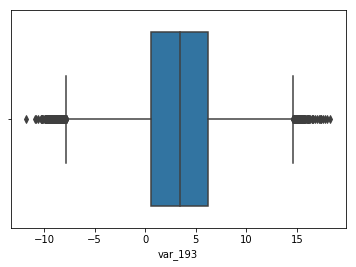

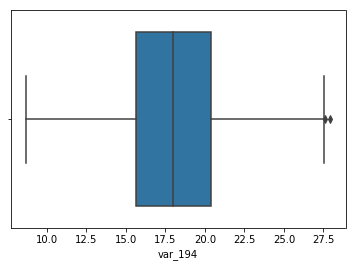

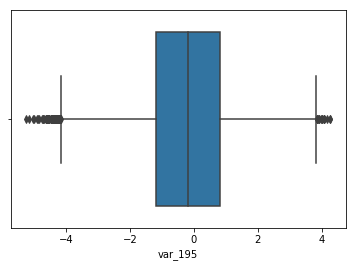

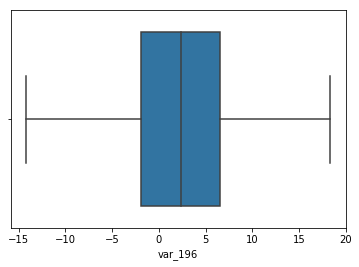

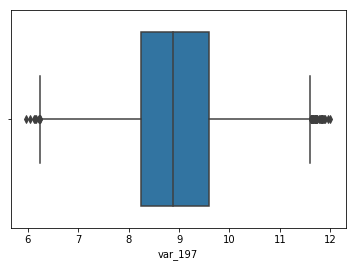

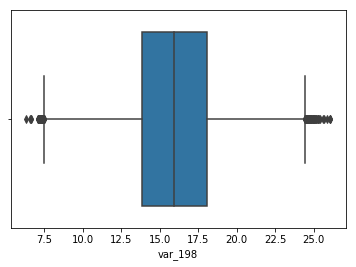

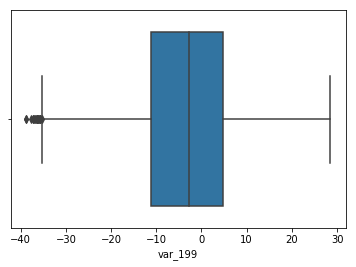

In [10]:
for i in train.iloc[:, 2:203]:    ##boxplot for all the variables to find the outliers
    sns.boxplot(x=train[i])  
    plt.show()

# calculate outliers

In [11]:
def IQR(dist):    ### to get IQR
    return np.percentile(dist, 75) - np.percentile(dist, 25)

In [44]:
dist= train['var_5']  

In [45]:
ub=np.percentile(dist,75)+1.5*(np.percentile(dist, 75) - np.percentile(dist, 25))   ### upper boundary
ub   

19.112525

In [53]:
sum(dist>ub)   ### to get the no.of values greater than upper boundary

0

In [46]:
lb=np.percentile(dist,25)-1.5*(np.percentile(dist, 75) - np.percentile(dist, 25))   ###lower boundary
lb

-29.388075

In [52]:
sum(dist<lb)     ### to get the no.of values greater than lower boundary

0

In [48]:
def outliers(dist):     #### function to  calculate the outliers for each column in the dataset
    ub=np.percentile(dist,75)+1.5*(np.percentile(dist, 75) - np.percentile(dist, 25))
    lb=np.percentile(dist,25)-1.5*(np.percentile(dist, 75) - np.percentile(dist, 25))
    if (sum(dist>ub) + sum(dist<lb))!=0:
        return sum(dist>ub),sum(dist<lb)
    else:
        return 0

In [49]:
def rep_outliers(dist):    ###function to replace the outliers with upper boundary and lower boundary values
    if outliers(dist)!=0:
        dist[dist>ub]=ub
        dist[dist<lb]=lb
        

In [67]:
for i in train.iloc[:,2:202].columns:   ##replace the outliers with upper boundary and lower boundary values
    rep_outliers(train[i])

C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


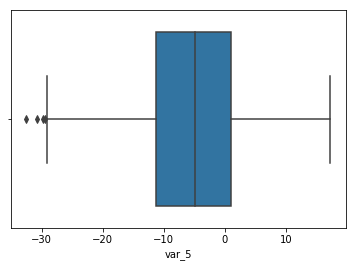

In [30]:
sns.boxplot(train['var_5'])    

In [74]:
x = train.iloc[:,2:202]    ##subsetting the data 


In [75]:
y = train['target']       ### subsetting the target variable from the dataset

# Apply random forest to find feature importance

In [133]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8978030303030303

In [134]:

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

Text(0.5, 0, 'Relative Importance')

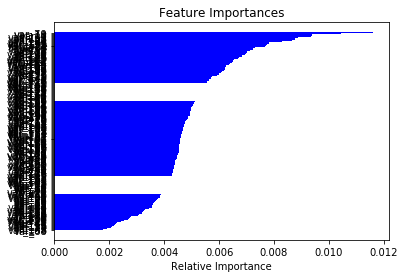

In [135]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), train.columns[indices])
plt.xlabel('Relative Importance')

In [136]:
features=list(feature_importances.index[0:30])

In [137]:
x_new=x.loc[:,features]

In [140]:
X_new = test.loc[:,features]   ### for test data

,var_81,var_12,var_6,var_139,var_53,var_110,var_22,var_26,var_166,var_146,...,var_198,var_40,var_99,var_148,var_80,var_191,var_164,var_179,var_154,var_1
0,16.9060,13.9696,5.8493,-2.5502,7.3213,3.7662,1.5899,-9.4902,2.5531,11.6793,...,15.4722,-15.6305,1.8585,4.1017,9.4883,11.8495,-8.6105,2.2926,18.9880,7.7798
1,14.0406,14.1129,6.0196,6.7530,6.8481,1.7375,5.2578,-5.2341,3.2185,8.7644,...,19.1293,10.0309,-1.4166,4.1240,1.9772,8.8349,-10.6572,5.2110,7.7732,1.2543
2,14.3299,13.6751,4.8950,-6.0452,5.6510,8.6896,4.7473,-15.4246,3.1243,11.6749,...,19.8956,-19.0841,1.7818,4.2600,16.1691,10.9935,-0.5382,4.4611,7.2638,-10.3581
3,15.4375,14.0526,4.9397,12.7898,6.2536,10.3445,2.9707,1.0061,2.6415,8.6963,...,13.0168,-4.8327,2.6165,3.8265,17.5941,9.0766,-11.0780,1.1019,5.0372,-1.3222
4,16.7661,14.1013,6.8595,11.7989,5.6794,6.3933,6.7954,8.6228,3.2348,12.9327,...,13.9260,-14.4364,0.1148,4.2135,11.8133,9.1723,-11.9785,6.0889,3.4368,-0.1327
5,16.0807,14.0581,4.2467,-0.7009,5.2122,3.3909,6.5080,-7.2154,3.0711,11.0207,...,17.1127,-10.7780,-0.6977,4.0888,6.4326,7.1178,-13.2809,1.6738,3.2240,-2.2913
6,12.5293,13.7682,4.1670,3.5594,5.9612,5.8805,3.9038,-15.1986,2.8187,5.8965,...,18.4736,-11.4996,-1.7311,3.9294,-0.8756,6.8661,-6.2154,2.2162,10.0876,-6.1065
7,18.7879,14.1455,5.9596,5.7673,6.4081,5.5510,5.8071,-6.3679,3.1809,14.5101,...,23.4631,-1.0589,-0.7070,4.0720,3.8249,4.4214,-3.8513,2.0752,8.2277,-2.4212
8,16.0976,14.3322,4.3386,7.7289,6.5384,7.5274,7.7823,-6.3747,2.7477,9.5314,...,16.9865,-8.9754,-3.3947,4.1288,-2.9163,7.8754,1.3582,3.0689,4.5274,0.8402
9,15.2616,14.0862,3.4508,17.8358,6.3294,4.1504,0.6735,-11.4772,2.7786,8.3408,...,15.8146,-5.6343,-1.3575,4.0860,15.3127,11.0723,-9.8056,-1.2921,6.3598,-6.9348


# Model Building

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
from sklearn.model_selection import train_test_split  ###splitting the train data to train and test 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [124]:
from sklearn.linear_model import LogisticRegression    ###applying the logistic regression to dataset
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
prediction=clf.predict(X_test)       ###prediction

In [186]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Test

In [ ]:
test

In [169]:
test = test.assign(C="")

In [170]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,C
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,


In [177]:
test.shape

(200000, 202)

In [180]:
x_f = test.loc[:,'var_0':'var_199']

In [181]:
x_f.shape

(200000, 200)

In [159]:
x_.shape

(200000, 31)

In [160]:
x_f= x_.iloc[:,:30]

In [162]:
x_f.shape

(200000, 30)

In [161]:
 y_f=x_['C']

In [ ]:
X_f, X_f, y_train, y_test = train_test_split(x_f, y_f, test_size=0.33, random_state=42)

In [188]:
pred=clf.predict(x_f)       ###prediction

In [189]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [190]:
x_f.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


# Model evaluation

In [191]:
from sklearn.metrics import accuracy_score,confusion_matrix,cohen_kappa_score   

In [128]:
confusion_matrix(prediction,y_test)

array([[58458,  4929],
       [  788,  1825]], dtype=int64)

In [129]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))


Accuracy: 0.9133787878787879
F1 score: 0.3896658481904559
Recall: 0.27021024578027836
Precision: 0.6984309223115194

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     59246
           1       0.70      0.27      0.39      6754

   micro avg       0.91      0.91      0.91     66000
   macro avg       0.81      0.63      0.67     66000
weighted avg       0.90      0.91      0.90     66000


 confussion matrix:
 [[58458   788]
 [ 4929  1825]]


# Applying XGBOOST to the dataset

In [70]:
from xgboost import XGBClassifier
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7,
                     gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(X_train,y_train)
prediction = modelXg.predict(X_test)

C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Model Evaluation

In [71]:
print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))


Accuracy: 0.9148181818181819
F1 score: 0.4668057663125948
Recall: 0.36437666567959726
Precision: 0.6493403693931399

 clasification report:
              precision    recall  f1-score   support

          0       0.93      0.98      0.95     59246
          1       0.65      0.36      0.47      6754

avg / total       0.90      0.91      0.90     66000


 confussion matrix:
 [[57917  1329]
 [ 4293  2461]]
